<a href="https://colab.research.google.com/github/kaganseyda/projects/blob/main/yks24_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
df1= pd.read_csv('2021.csv')
df2=pd.read_csv('2023.csv')
df1['SÖZEL'] = df1['SÖZEL'].replace('-', '0')
df1


,Puan,TYT,SAYISAL,SÖZEL,EŞİT AĞIRLIK,DİL
0,540,58,29,0,8,33
1,520,364,367,7,30,205
2,500,1394,1418,44,100,738
3,480,3959,3690,127,281,1643
4,460,9371,8436,306,665,3020
5,440,21134,16546,679,1560,6170
6,420,39326,28445,1440,3749,8213
7,400,64820,43527,3335,8394,12538
8,380,97862,60191,8061,11811,18121
9,360,138681,80844,11756,35656,24223


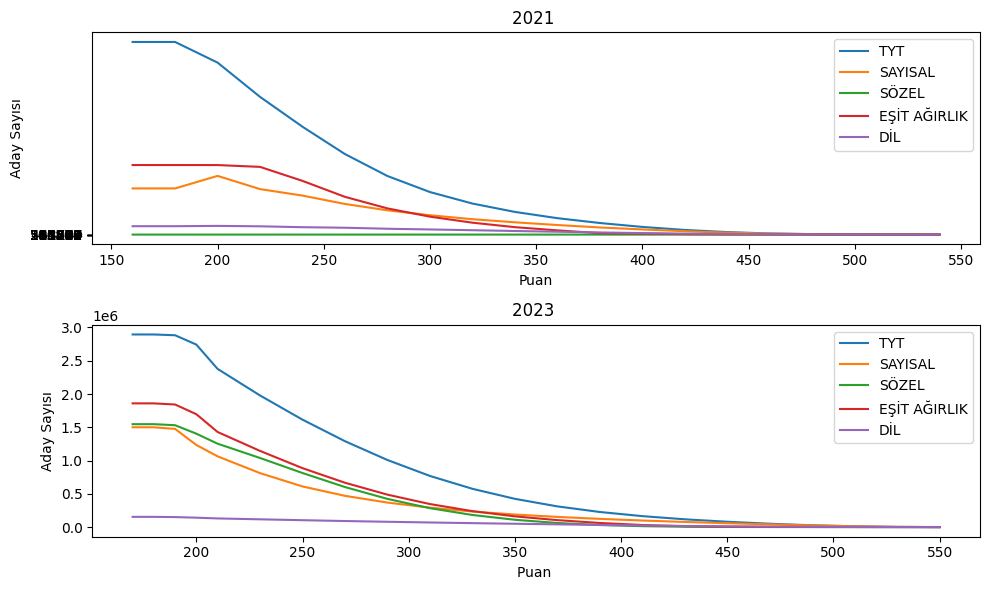

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(df1['Puan'], df1['TYT'], label='TYT')
plt.plot(df1['Puan'], df1['SAYISAL'], label='SAYISAL')
plt.plot(df1['Puan'], df1['SÖZEL'], label='SÖZEL')
plt.plot(df1['Puan'], df1['EŞİT AĞIRLIK'], label='EŞİT AĞIRLIK')
plt.plot(df1['Puan'], df1['DİL'], label='DİL')
plt.xlabel('Puan')
plt.ylabel('Aday Sayısı')
plt.title('2021 ')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df2['Puan'], df2['TYT'], label='TYT')
plt.plot(df2['Puan'], df2['SAYISAL'], label='SAYISAL')
plt.plot(df2['Puan'], df2['SÖZEL'], label='SÖZEL')
plt.plot(df2['Puan'], df2['EŞİT AĞIRLIK'], label='EŞİT AĞIRLIK')
plt.plot(df2['Puan'], df2['DİL'], label='DİL')
plt.xlabel('Puan')
plt.ylabel('Aday Sayısı')
plt.title('2023 ')
plt.legend()
plt.tight_layout()
plt.show()


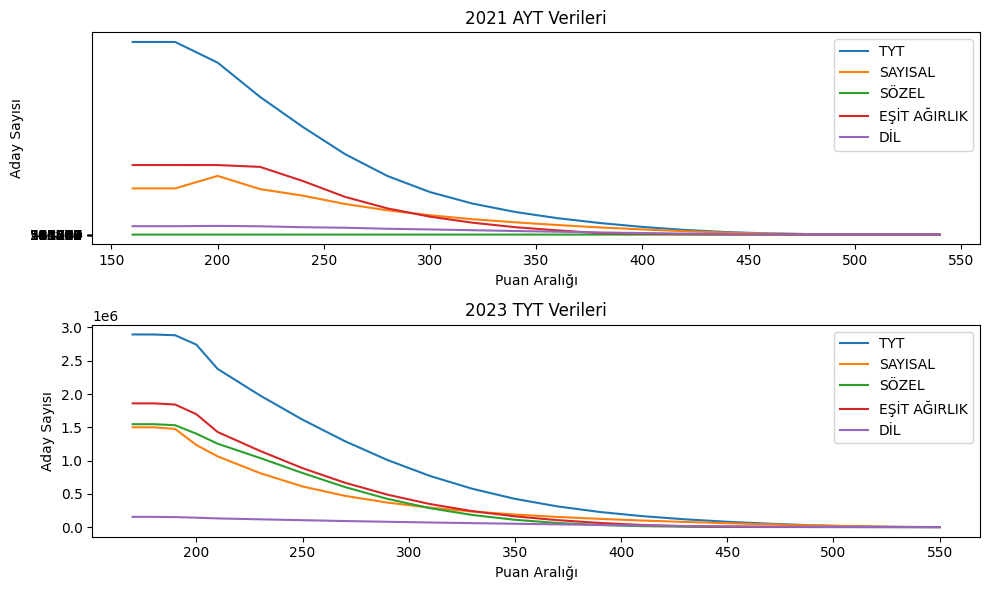

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(df1['Puan'], df1['TYT'], label='TYT')
plt.plot(df1['Puan'], df1['SAYISAL'], label='SAYISAL')
plt.plot(df1['Puan'], df1['SÖZEL'], label='SÖZEL')
plt.plot(df1['Puan'], df1['EŞİT AĞIRLIK'], label='EŞİT AĞIRLIK')
plt.plot(df1['Puan'], df1['DİL'], label='DİL')
plt.xlabel('Puan Aralığı')
plt.ylabel('Aday Sayısı')
plt.title('2021 AYT Verileri')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df2['Puan'], df2['TYT'], label='TYT')
plt.plot(df2['Puan'], df2['SAYISAL'], label='SAYISAL')
plt.plot(df2['Puan'], df2['SÖZEL'], label='SÖZEL')
plt.plot(df2['Puan'], df2['EŞİT AĞIRLIK'], label='EŞİT AĞIRLIK')
plt.plot(df2['Puan'], df2['DİL'], label='DİL')
plt.xlabel('Puan Aralığı')
plt.ylabel('Aday Sayısı')
plt.title('2023 TYT Verileri')
plt.legend()
plt.tight_layout()
plt.show()


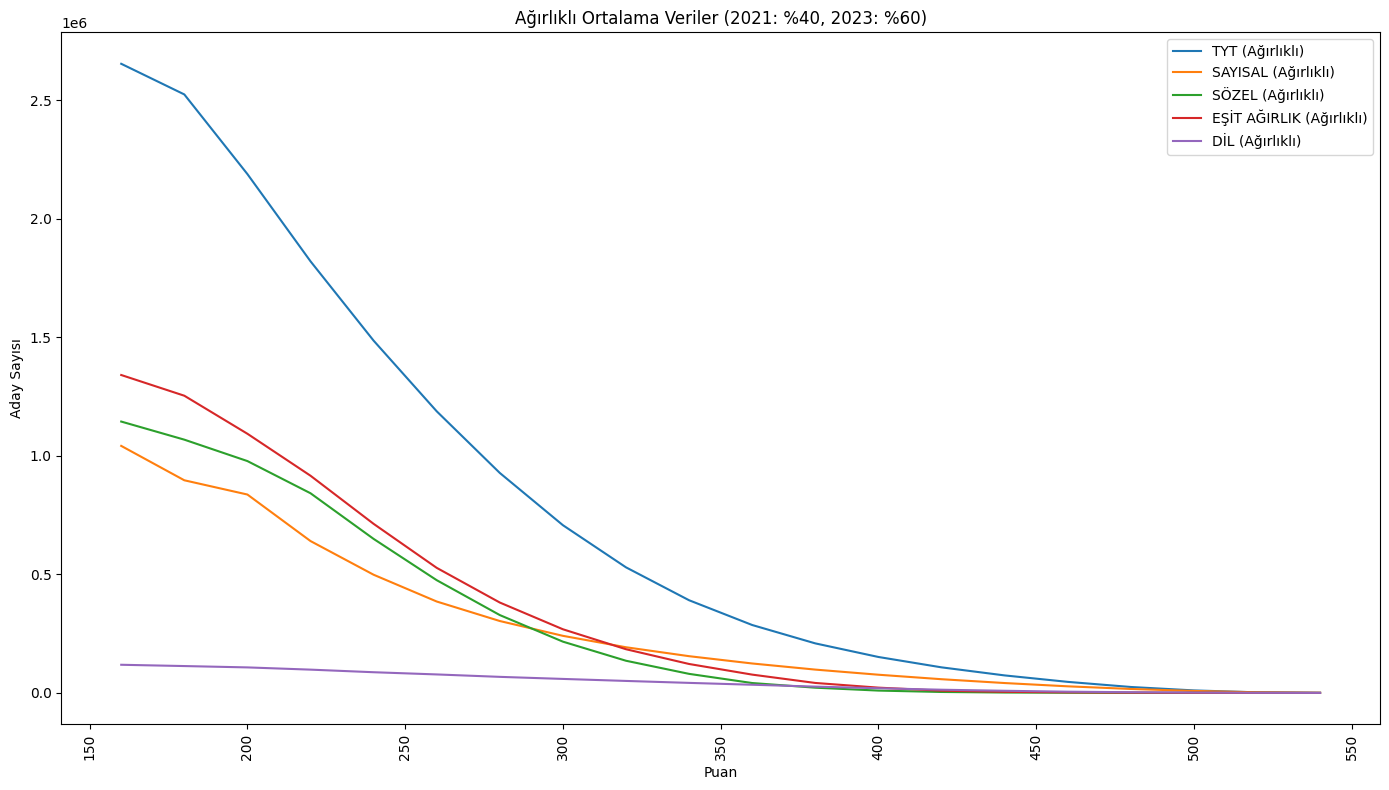

In [78]:
df1['SÖZEL'] = df1['SÖZEL'].astype(float)
df2['SÖZEL'] = df2['SÖZEL'].astype(float)


weighted_data = df1.copy()
weighted_data['TYT'] = df2['TYT'] * 0.92
weighted_data['SAYISAL'] = df1['SAYISAL'] * 0.4 + df2['SAYISAL'] * 0.6
weighted_data['SÖZEL'] = df1['SÖZEL'] * 0.4 + df2['SÖZEL'] * 0.6
weighted_data['EŞİT AĞIRLIK'] = df1['EŞİT AĞIRLIK'] * 0.4 + df2['EŞİT AĞIRLIK'] * 0.6
weighted_data['DİL'] = df1['DİL'] * 0.4 + df2['DİL'] * 0.6

plt.figure(figsize=(14, 8))

plt.plot(weighted_data['Puan'], weighted_data['TYT'], label='TYT (Ağırlıklı)')
plt.plot(weighted_data['Puan'], weighted_data['SAYISAL'], label='SAYISAL (Ağırlıklı)')
plt.plot(weighted_data['Puan'], weighted_data['SÖZEL'], label='SÖZEL (Ağırlıklı)')
plt.plot(weighted_data['Puan'], weighted_data['EŞİT AĞIRLIK'], label='EŞİT AĞIRLIK (Ağırlıklı)')
plt.plot(weighted_data['Puan'], weighted_data['DİL'], label='DİL (Ağırlıklı)')

plt.xlabel('Puan')
plt.ylabel('Aday Sayısı')
plt.title('Ağırlıklı Ortalama Veriler (2021: %40, 2023: %60)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [75]:
corr_tyt = weighted_data['Puan'].corr(weighted_data['TYT'])
corr_sayisal = weighted_data['Puan'].corr(weighted_data['SAYISAL'])
corr_sozel = weighted_data['Puan'].corr(weighted_data['SÖZEL'])
corr_esit_agirlik = weighted_data['Puan'].corr(weighted_data['EŞİT AĞIRLIK'])
corr_dil = weighted_data['Puan'].corr(weighted_data['DİL'])

print(f"TYT ile Puan Korelasyonu: {corr_tyt}")
print(f"SAYISAL ile Puan Korelasyonu: {corr_sayisal}")
print(f"SÖZEL ile Puan Korelasyonu: {corr_sozel}")
print(f"EŞİT AĞIRLIK ile Puan Korelasyonu: {corr_esit_agirlik}")
print(f"DİL ile Puan Korelasyonu: {corr_dil}")


TYT ile Puan Korelasyonu: -0.9142764019275048
SAYISAL ile Puan Korelasyonu: -0.9022157505726315
SÖZEL ile Puan Korelasyonu: -0.8809096975418997
EŞİT AĞIRLIK ile Puan Korelasyonu: -0.8861508063975615
DİL ile Puan Korelasyonu: -0.9794638005950748


In [76]:
from scipy.stats import linregress


slope, intercept, r_value, p_value, std_err = linregress(weighted_data['Puan'], weighted_data['TYT'])
print(f"TYT için Regresyon Analizi R Değeri: {r_value}")




TYT için Regresyon Analizi R Değeri: -0.9142764019275047


In [79]:
girilen_puan = float(input("Puan giriniz: "))


alt_puan = weighted_data.loc[weighted_data['Puan'] <= girilen_puan, 'Puan'].max()
ust_puan = weighted_data.loc[weighted_data['Puan'] >= girilen_puan, 'Puan'].min()


if alt_puan != ust_puan:
    alt_aday_sayısı = weighted_data.loc[weighted_data['Puan'] == alt_puan, 'TYT'].values[0]
    ust_aday_sayısı = weighted_data.loc[weighted_data['Puan'] == ust_puan, 'TYT'].values[0]

    # y = y1 + (x - x1) * (y2 - y1) / (x2 - x1)
    aday_sayısı = alt_aday_sayısı + (girilen_puan - alt_puan) * (ust_aday_sayısı - alt_aday_sayısı) / (ust_puan - alt_puan)
else:
    aday_sayısı = weighted_data.loc[weighted_data['Puan'] == alt_puan, 'TYT'].values[0]

print(f"Girilen puan ({girilen_puan}) için yakın alt puan: {alt_puan}")
print(f"Girilen puan ({girilen_puan}) için yakın üst puan: {ust_puan}")
print(f"TYT sıralaman: ({aday_sayısı + 10000})")


Puan giriniz: 488
Girilen puan (488.0) için yakın alt puan: 480
Girilen puan (488.0) için yakın üst puan: 500
TYT sınavında tahmini aday sayısı: (29132.504)


In [80]:
girilen_puan = float(input("Puan giriniz: "))


alt_puan = weighted_data.loc[weighted_data['Puan'] <= girilen_puan, 'Puan'].max()
ust_puan = weighted_data.loc[weighted_data['Puan'] >= girilen_puan, 'Puan'].min()


if alt_puan != ust_puan:
    alt_aday_sayısı = weighted_data.loc[weighted_data['Puan'] == alt_puan, 'SAYISAL'].values[0]
    ust_aday_sayısı = weighted_data.loc[weighted_data['Puan'] == ust_puan, 'SAYISAL'].values[0]


    aday_sayısı = alt_aday_sayısı + (girilen_puan - alt_puan) * (ust_aday_sayısı - alt_aday_sayısı) / (ust_puan - alt_puan)
else:
    aday_sayısı = weighted_data.loc[weighted_data['Puan'] == alt_puan, 'SAYISAL'].values[0]

print(f"Girilen puan ({girilen_puan}) data aralığı: {alt_puan}")
print(f"Girilen puan ({girilen_puan}) data aralığı: {ust_puan}")
print(f"Sayısal sıralaman: {aday_sayısı}")

Puan giriniz: 458
Girilen puan (458.0) için yakın alt puan: 440
Girilen puan (458.0) için yakın üst puan: 460
AYT sınavında tahmini aday sayısı: 29096.079999999998
